In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir("C:/Users/Joe/OneDrive/سطح المكتب/Task")
df = pd.read_csv("titanic.csv",sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
#I will remove the column cabin because it has alot of NaNs
df=df.drop(columns='Cabin')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [4]:
# Replacing the NaNs found in the Embarked coumns by the most occuring value 'S'
df['Embarked'].fillna('S',inplace=True)

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Embarked']=encoder.fit_transform(df['Embarked'])
print(df['Embarked'].value_counts())
df['Sex']=encoder.fit_transform(df['Sex'])
print(df['Sex'].value_counts())
df['Survived']=encoder.fit_transform(df['Survived'])
print(df['Survived'].value_counts())

2    646
0    168
1     77
Name: Embarked, dtype: int64
1    577
0    314
Name: Sex, dtype: int64
0    549
1    342
Name: Survived, dtype: int64


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2


In [8]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
x=df.drop(["Survived", "Name", "Ticket", "Embarked"], axis=1)
y= df["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
tree1 = tree.DecisionTreeClassifier()  
tree1.fit(x_train, y_train)   #fitting our model
y_pred=tree1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7597765363128491


In [9]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(tree1, out_file=None)

# Draw graph
graph = graphviz.Source(dot_data) 
graph

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

KeyError: 2

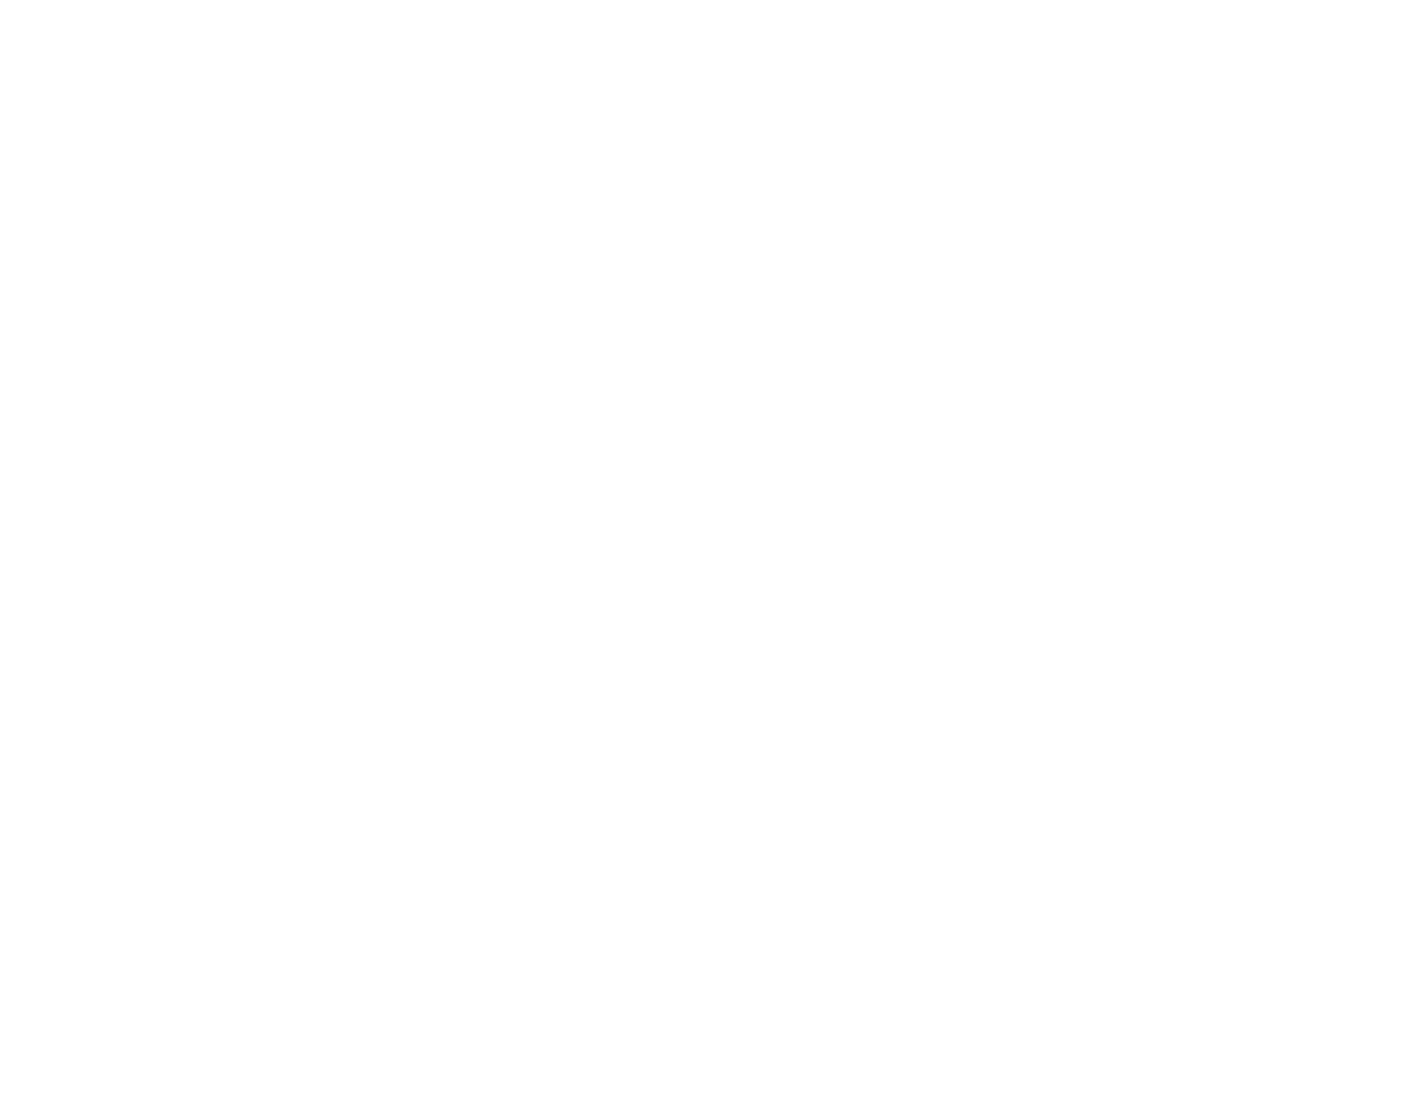

In [10]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree1, 
                   feature_names=x,  
                   class_names=y,
                   filled=True)